# 분석 할 과제

## 카테고리 별 소분류를 중심으로 연도별 검색건수 변화 파악(티맵 검색건수 이용)
- 각 연도별, 소분류 카테고리마다 검색건수의 합계 파악
- 전년도 대비 해당 년도의 증가분이 발생했는지 파악

[사용 데이터]
- 2019년 지역별 관광지(네비게이션) 검색순위 데이터
- 2020년 지역별 관광지(네비게이션) 검색순위 데이터
- 2021년 지역별 관광지(네비게이션) 검색순위 데이터

[변수 설명]
1. 네비게이션 데이터

- df2019 : 2019년 지역별 관광지(네비게이션) 검색순위 데이터
- df2020 : 2020년 지역별 관광지(네비게이션) 검색순위 데이터
- df2021 : 2021년 지역별 관광지(네비게이션) 검색순위 데이터

2. 피벗 테이블 데이터 
- tmap1 : df2019 데이터의 소분류 카테고리를 기준으로 검색건수의 합계를 계산한 피벗  테이블
- tmap2 : df2020 데이터의 소분류 카테고리를 기준으로 검색건수의 합계를 계산한 피벗  테이블
- tmap3 : df2021 데이터의 소분류 카테고리를 기준으로 검색건수의 합계를 계산한 피벗  테이블

[데이터셋 설명]
- 순위 : 관광지의 검색량에 따른 순위 (가장 많을수록 순위가 높음)
- 관광지명 : 네비게이션 데이터에 속한 관광지명
- 도로명 주소 : 해당 관광지의 도로명 주소
- 중분류 카테고리 : 해당 관광지의 큰 범위의 카테고리
- 소분류 카테고리 : 해당 관광지의 구체적인 카테고리
- 검색건수 : 해당 관광지의 연간 검색건수

[사용할 칼럼]
- 해당 과정에서는 관광지명, 소분류 카테고리, 검색건수 칼럼의 데이터를 사용할 것임.

## [데이터 분석 과정]

### 1. 각 연도별 소분류의 검색건수 파악
- 각 연도(2019, 2020, 2021)별 네비게이션 데이터를 가져와 소분류 카테고리를 중심으로 검색건수 추출


### 2. 전년대비 검색건수의 증가분 파악 (소분류)
- 2019년 대비 2020년의 증가분을 구해서 그래프로 표현
- 2020년 대비 2021년의 증가분을 구해서 그래프로 표현
- 2019년 대비 2021년의 증가분을 구해서 그래프로 표현

- 증가분 공식
    - {(현재 해의 소분류 검색건수 - 전년도 소분류 검색건수) / 전년도 검색건수}

In [1]:
# 라이브러리 가져오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 가져오기
from matplotlib import font_manager, rc
font_path='C:/Windows/Fonts/gulim.ttc'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

In [3]:
# 데이터 불러오기
# df2019 = pd.read_excel('티맵검색(네비)/2019년 티맵.xlsx') # 2019년
# df2020 = pd.read_excel('티맵검색(네비)/2020년 티맵.xlsx') # 2020년
# df2021 = pd.read_excel('티맵검색(네비)/2021년 티맵.xlsx') # 2021년
df2019 = pd.read_excel('../dataset/raw_data/2019년 티맵.xlsx') # 2019년
df2020 = pd.read_excel('../dataset/raw_data/2020년 티맵.xlsx') # 2019년
df2021 = pd.read_excel('../dataset/raw_data/2021년 티맵.xlsx') # 2019년

In [4]:
df2019

,순위,관광지명,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,제주국제공항,제주 제주시 공항로 2-0,기타관광,교통시설,426005
1,2,동문재래시장,제주 제주시 관덕로14길 20-0,쇼핑,시장,262893
2,3,서귀포매일올레시장,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,224921
3,4,성산일출봉,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),159864
4,5,협재해수욕장,제주 제주시,자연관광,자연경관(하천/해양),150906
...,...,...,...,...,...,...
495,496,신영영화박물관 무비스타휴관,제주 서귀포시 태위로 536-0,문화관광,전시시설,1178
496,497,팰롱팰롱빛나는애월점,제주 제주시 애월해안로 474-0,쇼핑,기타쇼핑시설,1177
497,498,송당승마장,제주 제주시 번영로 2015-0,레저스포츠,육상레저스포츠,1171
498,499,한울랜드,제주 제주시 동백로 458-0,문화관광,전시시설,1165


In [5]:
# 각 연도별 소분류 카테고리를 기준으로 검색건수의 합계를 피벗테이블로 만들기
tmap1 = df2019.pivot_table(index='소분류 카테고리',aggfunc = 'sum', values='검색건수')
tmap2 = df2020.pivot_table(index='소분류 카테고리',aggfunc = 'sum', values='검색건수')
tmap3 = df2021.pivot_table(index='소분류 카테고리',aggfunc = 'sum', values='검색건수')

In [6]:
tmap1

,검색건수
소분류 카테고리,
공연시설,78646
교육시설,3244
교통시설,583714
기타관광,729288
기타레저스포츠,188154
기타문화관광지,44986
기타쇼핑시설,95294
농/산/어촌체험,26116
데이트코스,136996


In [7]:
# 하나의 데이터에 다른 년도의 검색건수 저장
tmap1['2020년 검색건수'] = tmap2['검색건수']
tmap1['2021년 검색건수'] = tmap3['검색건수']
# 칼럼명 재지정
tmap1.columns = ['2019년 검색건수','2020년 검색건수','2021년 검색건수']

#### 1. 2019년 검색건수

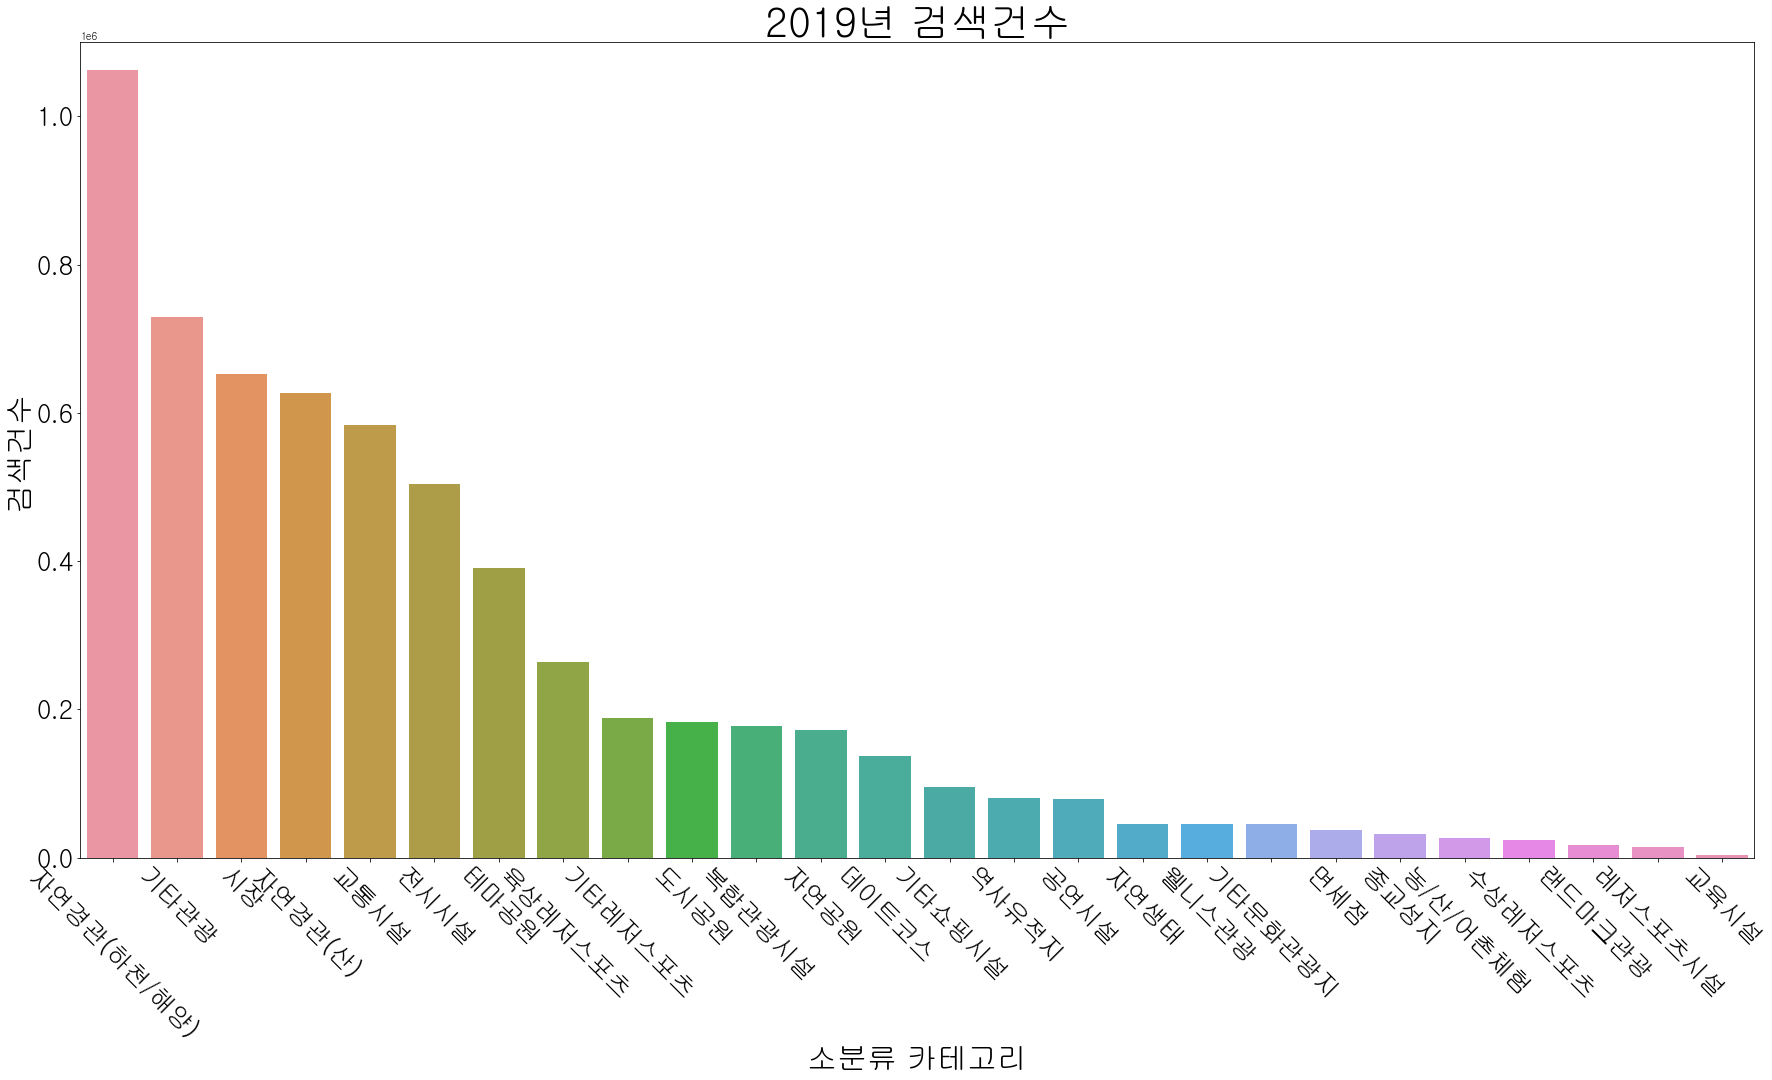

In [8]:
# 시각화 하기 전, 2019년 검색건수를 기준으로 데이터 내림차순 정렬
tmap1.sort_values(by='2019년 검색건수',ascending=False, inplace=True)
# 2019년 검색건수 시각화
plt.figure(figsize=(30,15))
# x축 : 인덱스(소분류 카테고리), y축 : 2019년 검색건수
sns.barplot(x=tmap1.index, y=tmap1['2019년 검색건수'])
plt.title('2019년 검색건수',fontsize=40)
plt.xlabel('소분류 카테고리',fontsize=30)
plt.ylabel('검색건수',fontsize=30)
plt.ylim((0,1100000))
# x축의 글자를 명확하게 볼 수 있게 하기 위해 rotation 지정
plt.xticks(fontsize=25, rotation=315)
plt.yticks(fontsize=25)
sns.color_palette('pastel')
plt.show()

#### 2. 2020년 검색건수

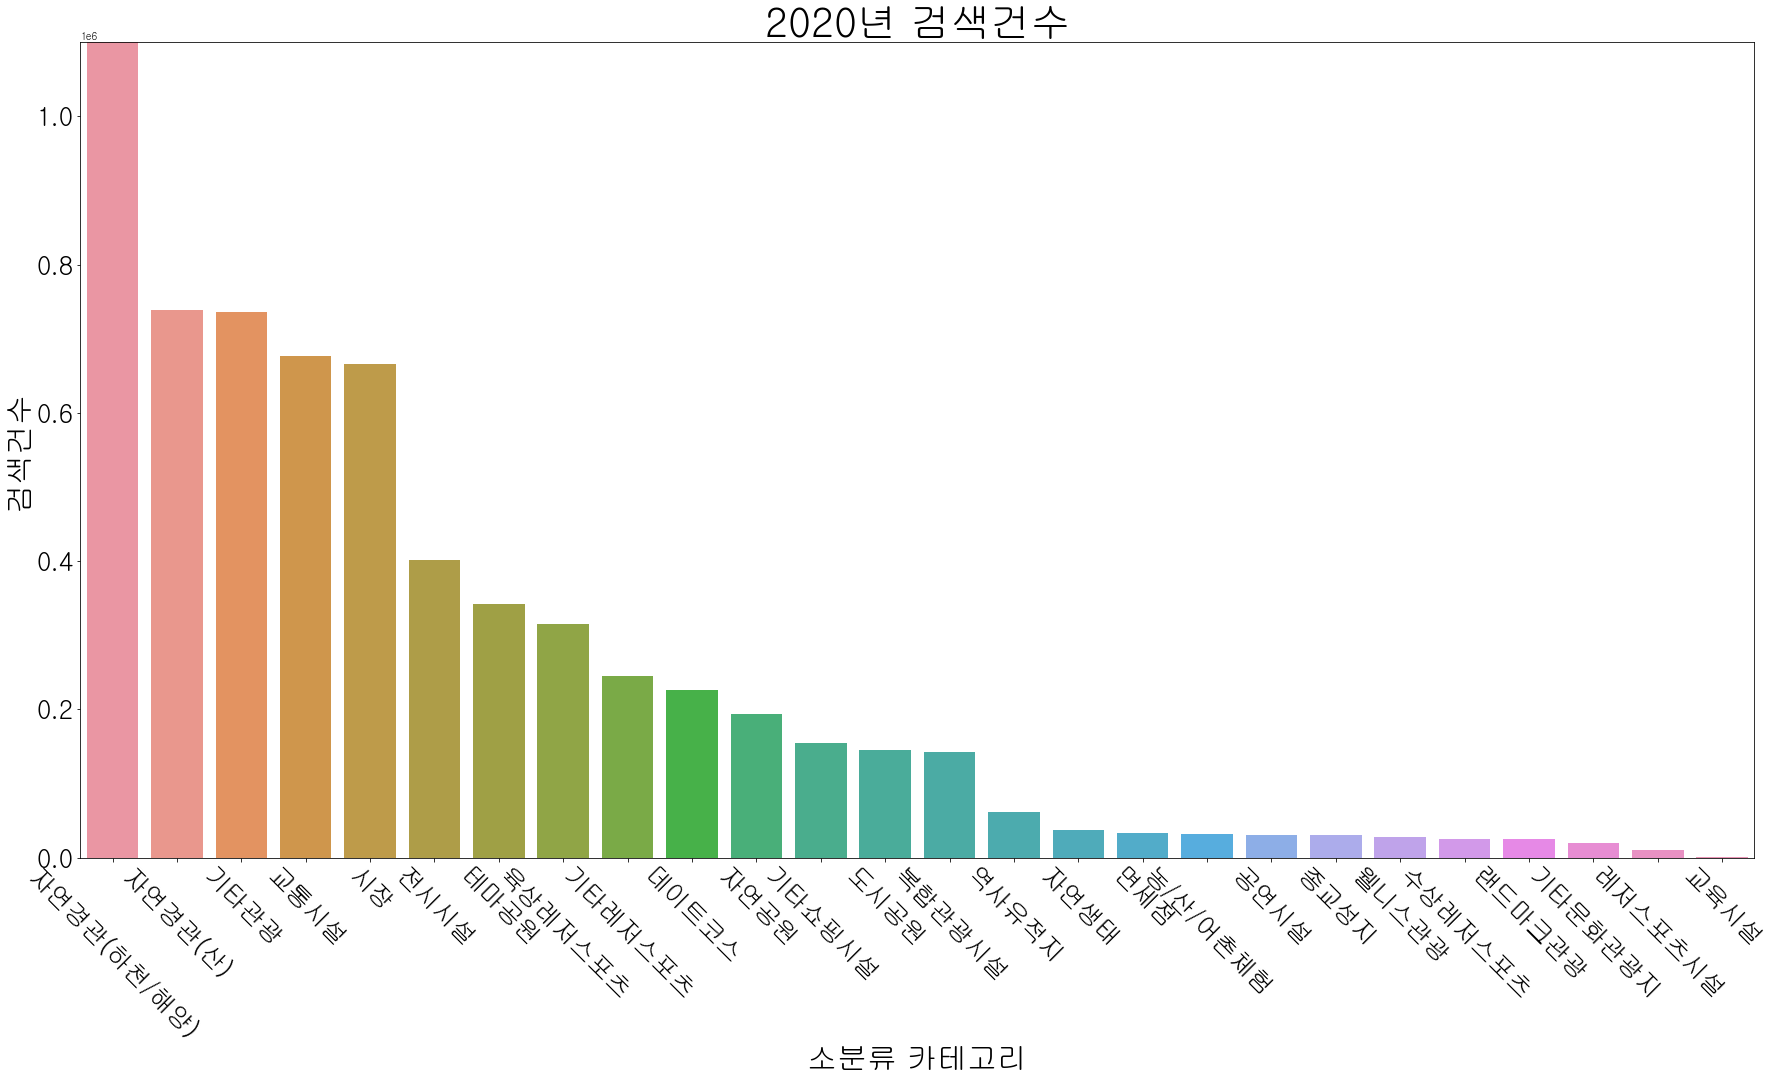

In [9]:
# 시각화 하기 전, 2020년 검색건수를 기준으로 데이터 내림차순 정렬
tmap1.sort_values(by='2020년 검색건수',ascending=False, inplace=True)
# 2020년 검색건수 시각화
plt.figure(figsize=(30,15))
# x축 : 인덱스(소분류 카테고리), y축 : 2020년 검색건수
sns.barplot(x=tmap1.index, y=tmap1['2020년 검색건수'])
plt.title('2020년 검색건수',fontsize=40)
plt.xlabel('소분류 카테고리',fontsize=30)
plt.ylabel('검색건수',fontsize=30)
plt.ylim((0,1100000))
# x축의 글자를 명확하게 볼 수 있게 하기 위해 rotation 지정
plt.xticks(fontsize=25, rotation=315)
plt.yticks(fontsize=25)
sns.color_palette('pastel')
plt.show()

#### 3. 2021년 검색건수

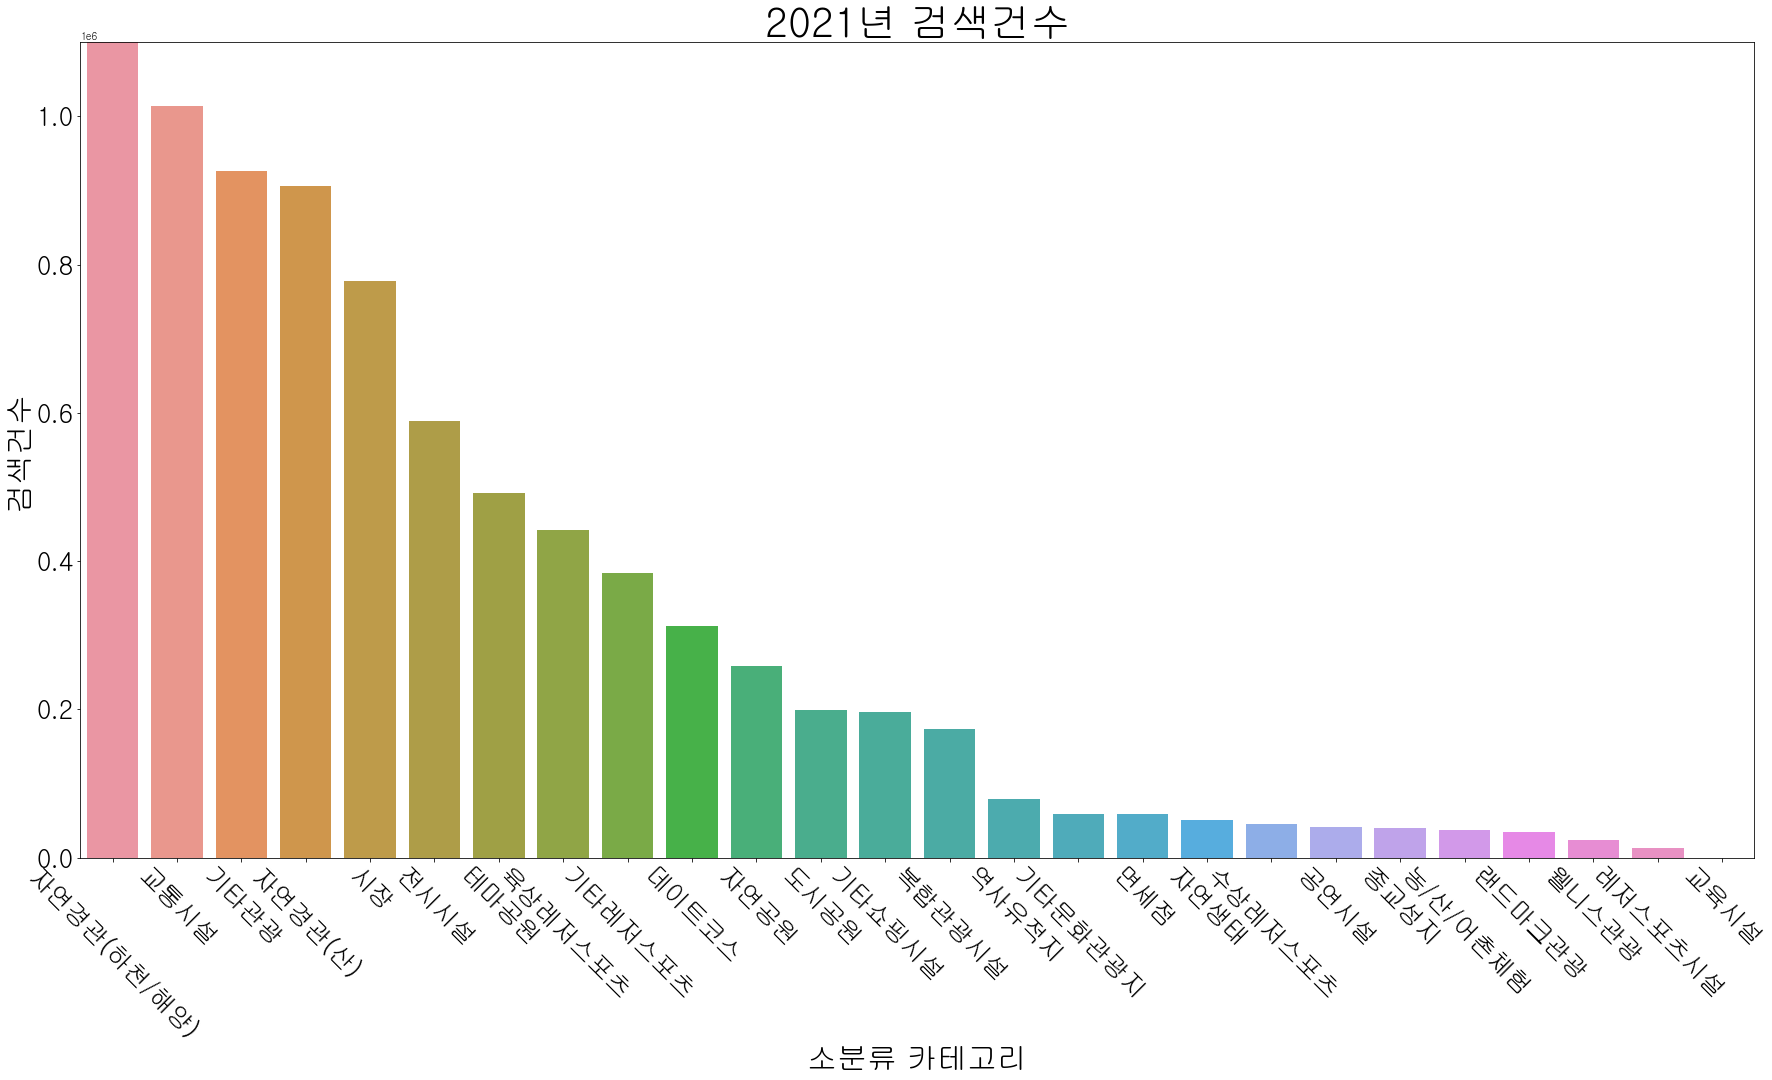

In [10]:
# 시각화 하기 전, 2020년 검색건수를 기준으로 데이터 내림차순 정렬
tmap1.sort_values(by='2021년 검색건수',ascending=False, inplace=True)
# 2020년 검색건수 시각화
plt.figure(figsize=(30,15))
# x축 : 인덱스(소분류 카테고리), y축 : 2020년 검색건수
sns.barplot(x=tmap1.index, y=tmap1['2021년 검색건수'])
plt.title('2021년 검색건수',fontsize=40)
plt.xlabel('소분류 카테고리',fontsize=30)
plt.ylabel('검색건수',fontsize=30)
plt.ylim((0,1100000))
# x축의 글자를 명확하게 볼 수 있게 하기 위해 rotation 지정
plt.xticks(fontsize=25, rotation=315)
plt.yticks(fontsize=25)
sns.color_palette('pastel')
plt.show()

### 2. 전년 대비 증가분 구하기

In [11]:
# NaN값이 있어서 0으로 채워줌
tmap1.fillna(0,inplace=True)

In [12]:
# 증가분 구하기 (2019대비 2020년, 2020년대비 2021년)
tmap1['2019년대비 2020년 변화추이'] = ((tmap1['2020년 검색건수']- tmap1['2019년 검색건수'])/ tmap1['2019년 검색건수']) * 100
tmap1['2020년대비 2021년 변화추이'] = ((tmap1['2021년 검색건수']- tmap1['2020년 검색건수'])/ tmap1['2020년 검색건수']) * 100

- 2019년, 2020년에는 교육시설 카테고리에 해당하는 값이 제주학생문화원 하나가 있었는데, 2021년에는 이 데이터가 없다. 그래서 NaN으로 나와서 0으로 처리함.

In [13]:
# 타입 변환
tmap1['2019년대비 2020년 변화추이'] = tmap1['2019년대비 2020년 변화추이'].astype('int')
tmap1['2020년대비 2021년 변화추이'] = tmap1['2020년대비 2021년 변화추이'].astype('int')

#### 1. 2019년대비 2020년 변화

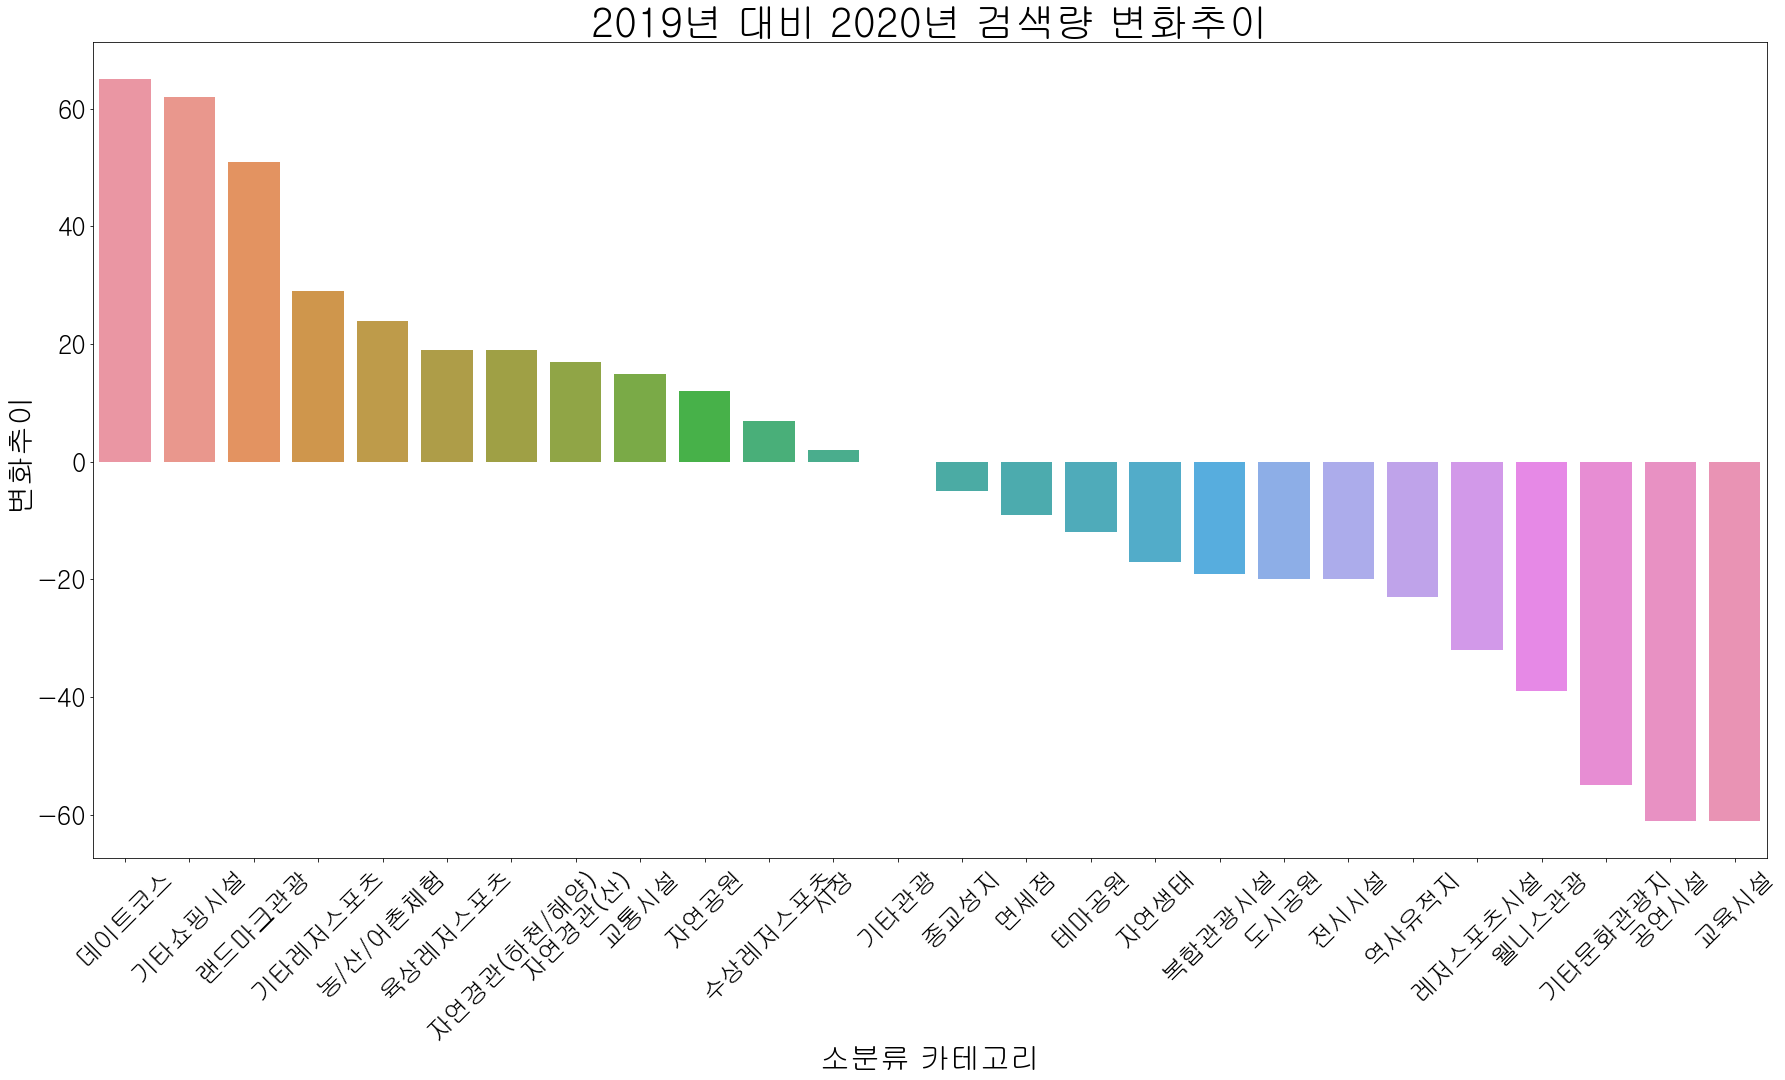

In [14]:
# 시각화 전, 2019년대비 2020년 변화추이 칼럼을 기준으로 내림차순 정렬
tmap1 = tmap1.sort_values(by='2019년대비 2020년 변화추이',ascending=False)
# 19년대비 20년의 증가분 시각화
plt.figure(figsize=(30,15))
sns.barplot(x=tmap1.index, y=tmap1['2019년대비 2020년 변화추이'])
plt.title('2019년 대비 2020년 검색량 변화추이',fontsize=40)
plt.xlabel('소분류 카테고리',fontsize=30)
plt.ylabel('변화추이',fontsize=30)
# x축의 글자를 명확하게 볼 수 있게 하기 위해 rotation 지정
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)
sns.color_palette('pastel')
plt.show()

#### 2. 2020년대비 2021년 변화

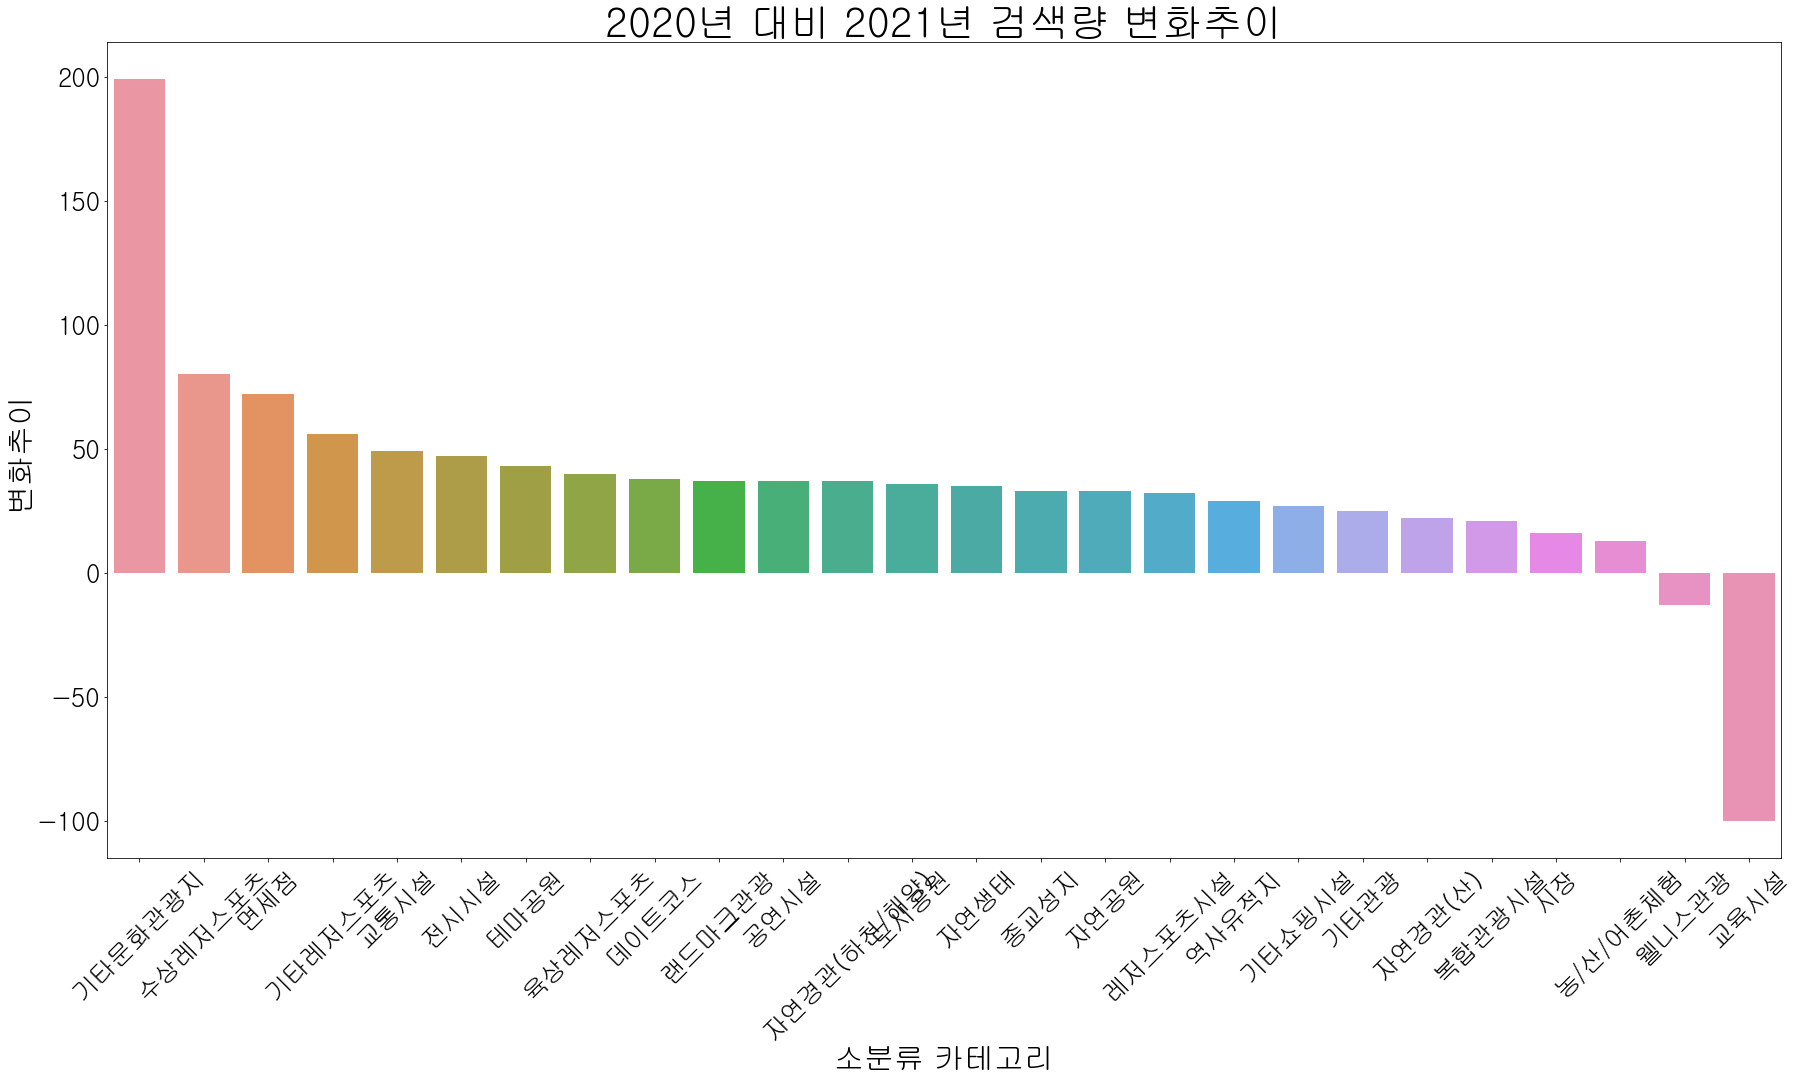

In [15]:
# 시각화 전, 2020년대비 2021년 변화추이 칼럼을 기준으로 내림차순 정렬
tmap1 = tmap1.sort_values(by='2020년대비 2021년 변화추이',ascending=False)
# 20년대비 21년 증가분 시각화
plt.figure(figsize=(30,15))
sns.barplot(x=tmap1.index, y=tmap1['2020년대비 2021년 변화추이'])
plt.title('2020년 대비 2021년 검색량 변화추이',fontsize=40)
plt.xlabel('소분류 카테고리',fontsize=30)
plt.ylabel('변화추이',fontsize=30)
# x축의 글자를 명확하게 볼 수 있게 하기 위해 rotation 지정
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)
sns.color_palette('pastel')
plt.show()

- 2020년 대비 2021년에는 딱 2개, 웰니스관광과 교육시설 2개에만 감소추세가 있었다
    - 웰니스 관광은 건강, 치유, 힐링을 목적으로 하는 여행이라고 하는데, 감소된 이유가 아무래도 코로나가 회복세에 있지 않아서 그런가 싶다.
    - 교육시설은 데이터가 없어서 NaN으로 나왔더니 바꿔준 값으로 체크하자니 -100이 나와버려서 감소추세로 드러났다.

#### 3.(번외) 2019년대비 2021년 변화추이

In [16]:
# 2019년 대비 2021년 증가분 측정
tmap1['2019년대비 2021년 변화추이'] = ((tmap1['2021년 검색건수']- tmap1['2019년 검색건수'])/ tmap1['2019년 검색건수']) * 100

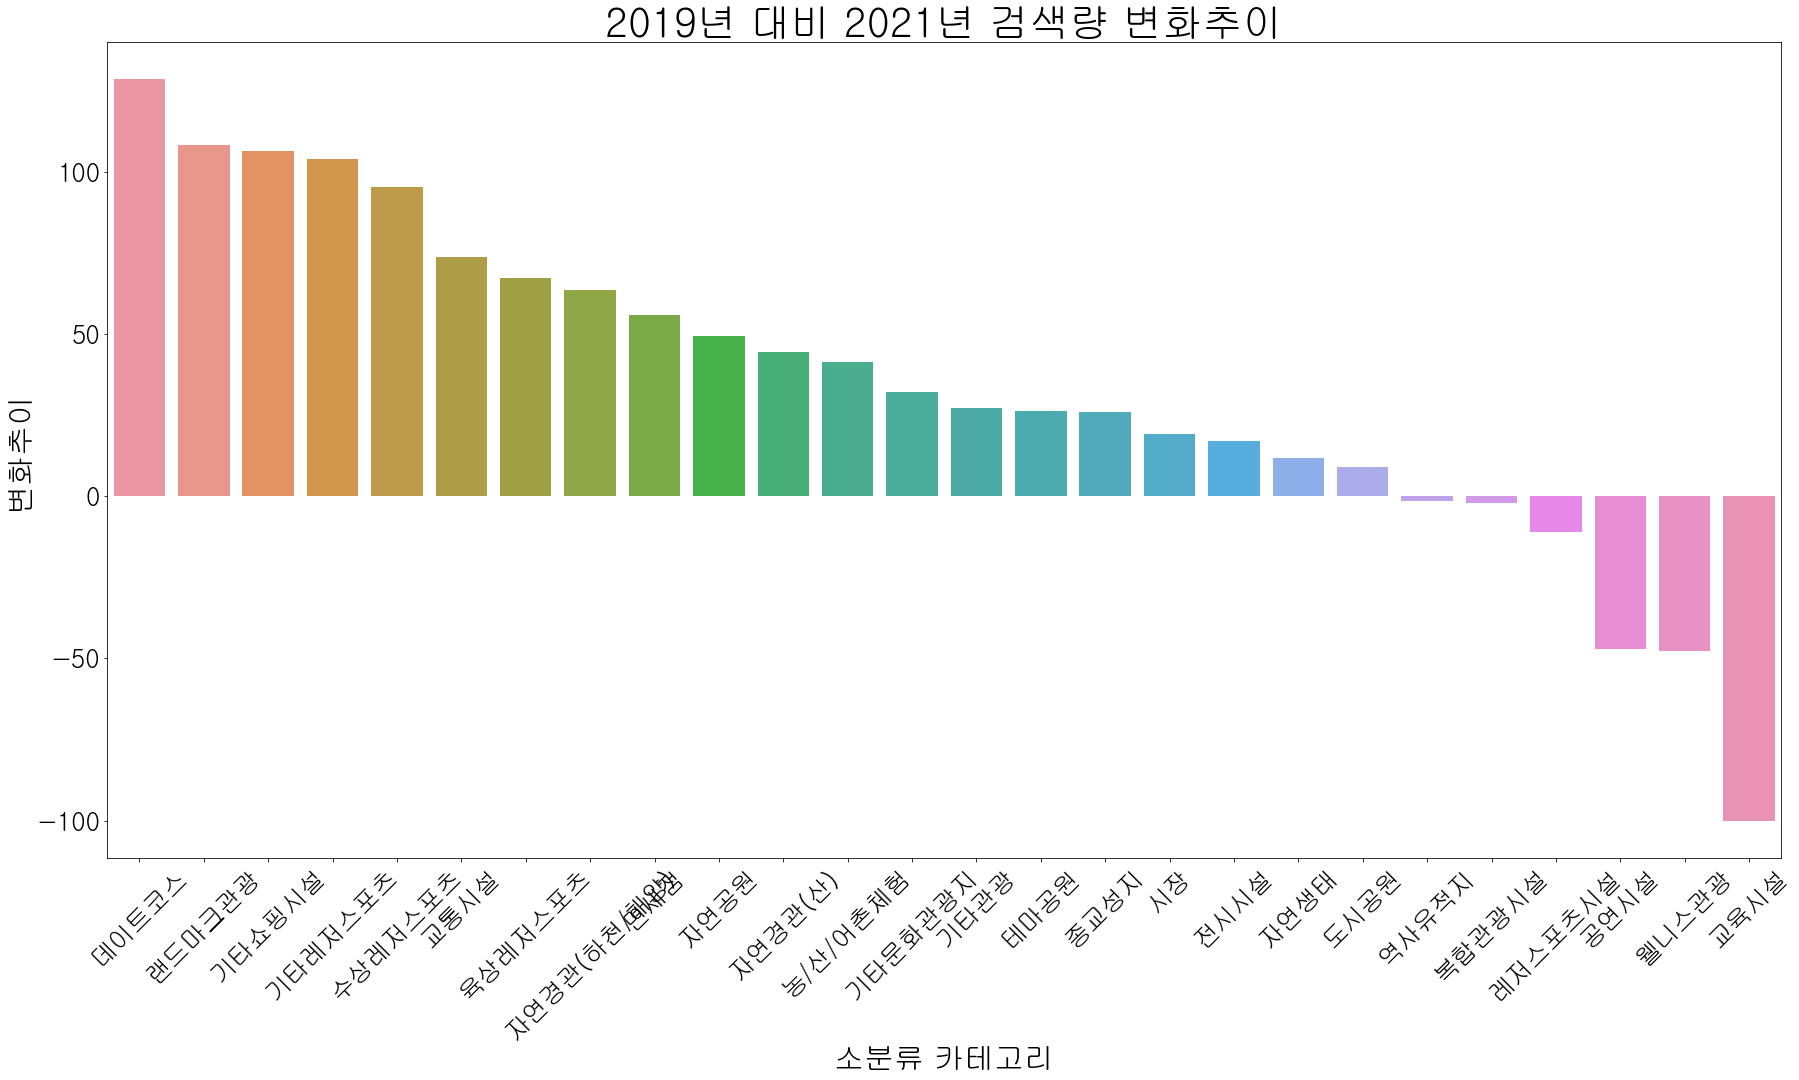

In [17]:
# 시각화 전, 2019년대비 2021년 변화추이 칼럼을 기준으로 내림차순 정렬
tmap1.sort_values(by='2019년대비 2021년 변화추이',ascending=False, inplace=True)
# 19년대비 21년 변화량 시각화
plt.figure(figsize=(30,15))
sns.barplot(x=tmap1.index, y=tmap1['2019년대비 2021년 변화추이'])
plt.title('2019년 대비 2021년 검색량 변화추이',fontsize=40)
plt.xlabel('소분류 카테고리',fontsize=30)
plt.ylabel('변화추이',fontsize=30)
# x축의 글자를 명확하게 볼 수 있게 하기 위해 rotation 지정
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)
sns.color_palette('pastel')
plt.show()